In [91]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from sklearn.utils import class_weight
from sklearn import metrics
import sys
import os
from math import log
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Tweakable Parameters**

In [7]:
# Image size (height x width)
ih = 64
iw = 64

# Grayscale or RGB
ch = 'grayscale'

# Batch size
batch_size = 64

# Number of epochs
epoch_t = 25

# Where computation is performed: Kaggle (0) or Local (1)
cenv = 1

# Division of the training vs. test set (in %)
test_size = 0.3

# Weight factor (1 is perfect reverse)
wf = 0.5

In [26]:
im_si = (ih, iw)

if(ch == 'rgb'):
    chnum = 3
elif(ch == 'grayscale'):
    chnum = 1

In [109]:
if cenv == 1:
    file_exists = []
    vnum = 1
    dir = "C:/Users/Max/Documents/GitHub/malimg_dataset"
    for files in os.listdir(dir):
        if "cnn" in files:
            try:
                vnum = max(vnum, int(files[-3:]))
            except: 
                continue
            new_vnum = vnum + 1
            file_exists.append(True)
        else: 
            file_exists.append(False)
    # If this is the first notebook you want to save, a new folder will be created with version #001
    if sum(file_exists) == 0:
        new_vnum = 1
        print("No matches found")

    else: 
        print(f"{sum(file_exists)} matches(es) found")
        print("--------------")

    # Print new folder name
    print(f"New folder name: cnn-local-v{new_vnum:03}")
    print("--------------")
    
    # Create new folder with the name of the notebook and the version number
    new_dir = f"/Users/Max/Documents/GitHub/malimg_dataset/cnn-local-v{new_vnum:03}"
    os.makedirs(new_dir)

No matches found
New folder name: cnn-local-v001
--------------


Retrieve Data

In [8]:
path_root = "C:/Users/Max/Documents/image_data/malimg_paper_dataset_imgs"

In [9]:
t_datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.3
    )

In [10]:
train = t_datagen.flow_from_directory(
    directory     = path_root, 
    color_mode    = ch, 
    target_size   = (ih,iw), 
    batch_size    = batch_size,
    interpolation = 'bicubic',
    subset='training',
    seed = 123
)

Found 6549 images belonging to 25 classes.


In [11]:
v_datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.3)

In [12]:
test = v_datagen.flow_from_directory(
    directory     = path_root, 
    color_mode    = ch, 
    target_size   = (ih,iw), 
    batch_size    = batch_size,
    interpolation = 'bicubic',
    subset='validation',
    seed = 123,
    shuffle = False
)

Found 2790 images belonging to 25 classes.


In [85]:
display = t_datagen.flow_from_directory(
    directory     = path_root, 
    color_mode    = ch, 
    target_size   = (ih,iw), 
    batch_size    = 50,
    interpolation = 'bicubic',
    subset='training',
    seed = 123,
    shuffle = True
)

Found 6549 images belonging to 25 classes.


In [59]:
num_samples = train.samples

In [60]:
train.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

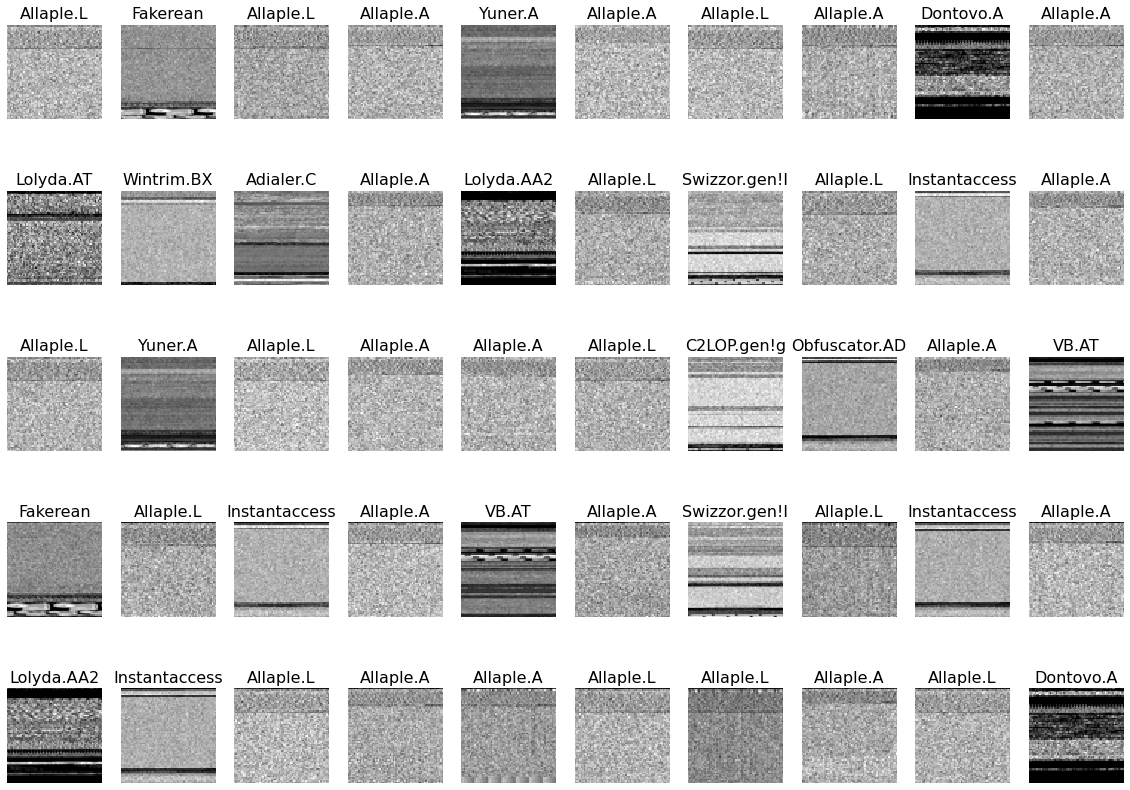

In [88]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        if (ims.shape[-1] != chnum):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(display.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], cmap = 'gray',interpolation=None if interp else 'none')

imgs, labels = display.next()
plots(imgs, titles = labels)

In [62]:
imgs.shape

(64, 64, 64, 1)

In [63]:
img, label = display.next()

In [64]:
display.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [93]:
perc = (sum(to_categorical(train.classes))/train.classes.shape[0])*100

NameError: name 'new_dir' is not defined

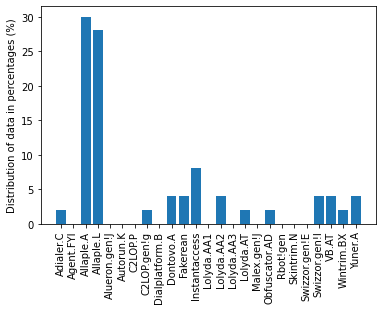

In [97]:
perc = (sum(labels)/labels.shape[0])*100
plt.xticks(rotation='vertical')
plt.bar(list(display.class_indices.keys()),perc)
plt.ylabel('Distribution of data in percentages (%)')

if cenv == 0:
    plt.savefig("multi_data_dist.png", bbox_inches = 'tight')
if cenv == 1:
    plt.savefig(f"{new_dir}/multi_data_dist.png", bbox_inches = 'tight')

# CNN MODEL

In [98]:
import keras
from keras.models import Sequential, Input, Model, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [99]:
num_classes = max(train.labels) + 1
print("The number of classes in our dataset: ", num_classes)

The number of classes in our dataset:  25


In [106]:
def malware_model():
    Malware_model = Sequential()
    Malware_model.add(Conv2D(30, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(ih,iw,chnum)))

    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(15, (3, 3), activation='LeakyReLU'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(128, activation='LeakyReLU'))
    Malware_model.add(Dropout(0.5))
    Malware_model.add(Dense(50, activation='LeakyReLU'))
    Malware_model.add(Dense(num_classes, activation='softmax'))
    Malware_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return Malware_model

In [107]:
Malware_model = malware_model()
Malware_model.summary() # Overview of the CNN model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 30)        300       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 15)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 15)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2940)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               3

In [110]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
if cenv == 0:
    checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)
if cenv == 1:
    checkpoint = ModelCheckpoint(f'{new_dir}/model.h5', verbose=1, save_best_only=True)


In [111]:
history = Malware_model.fit(
    train,
    steps_per_epoch=num_samples//batch_size,
    epochs=epoch_t,
    callbacks = [anne, checkpoint],
    validation_data=test,
    validation_steps=test.samples//batch_size) # The actual computation of the CNN

Epoch 1/25
102/102 [==============================] - 36s 330ms/step - loss: 1.5584 - accuracy: 0.5433 - val_loss: 0.7153 - val_accuracy: 0.7031

Epoch 00001: val_loss improved from inf to 0.71525, saving model to /Users/Max/Documents/GitHub/malimg_dataset/cnn-local-v001\model.h5
Epoch 2/25
102/102 [==============================] - 12s 121ms/step - loss: 0.4330 - accuracy: 0.8751 - val_loss: 0.2468 - val_accuracy: 0.9411

Epoch 00002: val_loss improved from 0.71525 to 0.24680, saving model to /Users/Max/Documents/GitHub/malimg_dataset/cnn-local-v001\model.h5
Epoch 3/25
102/102 [==============================] - 12s 121ms/step - loss: 0.2263 - accuracy: 0.9342 - val_loss: 0.2063 - val_accuracy: 0.9400

Epoch 00003: val_loss improved from 0.24680 to 0.20631, saving model to /Users/Max/Documents/GitHub/malimg_dataset/cnn-local-v001\model.h5
Epoch 4/25
102/102 [==============================] - 13s 123ms/step - loss: 0.1788 - accuracy: 0.9468 - val_loss: 0.1883 - val_accuracy: 0.9422

Epo

# Evaluating performance

In [112]:
from sklearn.metrics import f1_score, matthews_corrcoef, accuracy_score
from prettytable import PrettyTable, MSWORD_FRIENDLY

In [113]:
if cenv == 0:
    best_model = load_model("/kaggle/working/model.h5")
if cenv == 1:
    best_model = load_model(f"{new_dir}/model.h5")

In [114]:
scores = best_model.evaluate(test, steps = test.samples//batch_size) # Testing the CNN on the test set
print(f"Overall CNN Accuracy: {scores[1]}\n(The number of correct predictions divided by the number of total predictions)")

43/43 [==============================] - 4s 81ms/step - loss: 0.1456 - accuracy: 0.9666
Overall CNN Accuracy: 0.9665697813034058
(The number of correct predictions divided by the number of total predictions)


In [115]:
t = PrettyTable(['Metric', 'Performance'])
t.add_row(['Valididation accuracy', round(scores[1],4)])
t.add_row(['Validation loss', round(scores[0],4)])
t.header = True
t.align = "l"
t.title = "Performance of multi-class classification - CNN"
print(t)

+-------------------------------------------------+
| Performance of multi-class classification - CNN |
+-------------------------------+-----------------+
| Metric                        | Performance     |
+-------------------------------+-----------------+
| Valididation accuracy         | 0.9666          |
| Validation loss               | 0.1456          |
+-------------------------------+-----------------+


In [116]:
# Saving PrettyTable
table = t.get_string()

if cenv == 0:
    with open('multi_performance_table.txt', 'w') as f:
        f.write(table)
if cenv == 1:
    with open(f'{new_dir}/multi_performance_table.txt', 'w') as f:
        f.write(table)